<a href="https://colab.research.google.com/github/imeesam/ANN-for-CIFIAR-10/blob/main/ANN_for_CIFIAR_10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
(x_train , y_train),(x_test , y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# this Y _train actually just showing class nothing more which means 6 one is frog

In [ ]:
x_train.shape
# RGB

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[0]

array([6], dtype=uint8)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
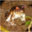

In [ ]:
x_train[0]

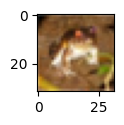

In [ ]:
plt.figure(figsize=(10,1))
plt.imshow(x_train[0])

In [ ]:
classes = ['airplane','	automobile','bird','cat','deer','dog','frog','horse','ship']

In [ ]:
y_train[0][0]  # this is returning the class

6

In [ ]:
classes[y_train[0][0]]  # this returning the name of that image

'frog'

In [ ]:
# now scaling the datasets because model tends to perform better when scale down, we will divide this by 255 because you  can max represent color till 0-255

In [ ]:
x_train[0]/255   # we have normalised them b/w 0 and 1

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [ ]:
x_train_scaled.shape #shape is same as orginal just values are normalised

(50000, 32, 32, 3)

In [ ]:
# for one hot encoding create an array of size 10 and specify the index at which class present remaing will be zero

In [ ]:
y_train_categorical = keras.utils.to_categorical(y_train,num_classes=10)
y_test_categorical = keras.utils.to_categorical(y_test,num_classes=10)

In [ ]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(2048,activation='relu'),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(10,activation='softmax')

])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics =['accuracy'])

model.fit(x_train_scaled,y_train_categorical,epochs=20)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2455 - loss: 2.1094
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3742 - loss: 1.7289
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4121 - loss: 1.6307
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4331 - loss: 1.5750
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4508 - loss: 1.5232
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4627 - loss: 1.4866
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4775 - loss: 1.4506
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4902 - loss: 1.4137
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4934 - loss: 1.3982
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5055 - loss: 1.3635
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5162 - loss: 1.3356
Epoch 12/20
1563/1563 ━━━

In [ ]:
len(classes)

9

In [ ]:
classes[np.argmax(model.predict(x_test_scaled)[2])]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


'airplane'

In [ ]:
classes[y_test[1][0]]

'ship'

In [ ]:
y_test[3]

array([0], dtype=uint8)

In [ ]:
np.argmax(model.predict(x_test_scaled)[3])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


8

In [ ]:
model.evaluate(x_test_scaled,y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5032 - loss: 1.4347


[1.4346160888671875, 0.5045999884605408]

In [ ]:
model.predict()